<p><img src= "https://www.pngitem.com/pimgs/m/114-1143971_google-play-logo-google-play-logo-transparent-background.png")></p>

Small project concentrated on apps available on Google Play.<br>
The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps).

#### 1. Importing and inspecting the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

apps1 = pd.read_csv('googleplaystore.csv')
print(apps1.sample(7))
print(apps1.shape)

                            App             Category  Rating  Reviews  Size  \
5648  Five Nights at Freddy's 3                 GAME     4.7    27856   50M   
9774      ER Hospital Simulator               FAMILY     4.0      286   60M   
5120            West Central Ag             BUSINESS     NaN        3  1.7M   
3543       Notepad & To do list         PRODUCTIVITY     4.3   226295  4.2M   
5775         The Pursuit of God  BOOKS_AND_REFERENCE     4.8        6  1.6M   
7404            SimCity BuildIt               FAMILY     4.5  4218587  100M   
4496       Q Cat Live Wallpaper      PERSONALIZATION     4.2     4383  7.1M   

         Installs  Type  Price Content Rating             Genres  \
5648     100,000+  Paid  $2.99           Teen             Action   
9774     100,000+  Free      0       Everyone         Simulation   
5120         100+  Free      0       Everyone           Business   
3543  10,000,000+  Free      0       Everyone       Productivity   
5775       1,000+  Free    

In [2]:
apps1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [3]:
apps1['Size'].tail(20)

10821                  2.5M
10822                  3.1M
10823                  2.9M
10824                   82M
10825                  7.7M
10826    Varies with device
10827                   13M
10828                   13M
10829                  7.4M
10830                  2.3M
10831                  9.8M
10832                  582k
10833                  619k
10834                  2.6M
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

Data in columns "Installs", "Price" and "Size" need to be cleaned. First two have special characters, the last one has letters "M" and "k" which presumably indicate size in Megabytes and kilobytes. <br> Their type will need to be changed to float, same goes for the Reviews column.

In [4]:
before_drop_dup = sum(apps1.App.duplicated())
#print(apps1[apps1.App.duplicated() == True].describe())
print('Number of duplicated apps:', before_drop_dup)

Number of duplicated apps: 1181


In [5]:
apps = apps1.drop_duplicates('App')
print('Number of unique apps:', len(apps))

Number of unique apps: 9660


#### 2. Data cleaning
As seen previously, columns "Installs" and "Price" include characters that make it unable to change their type. We need to get rid of any obstacles that prevent us from changing the types. Column "Size" also needs to be cleaned<br>


In [6]:
print(apps['Installs'].unique())
print(apps['Price'].unique())
print(apps['Size'].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'

Above we can se that we need to delete all special signs such as dollar signs and plusses. The size column shows size of application both in Megabytes (digits ending with M) and kilobytes (ones with k), this also needs to be taken care of.

In [7]:
print(apps['Size'].value_counts())

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 462, dtype: int64


While changing the type of column reviews an error popped up "Cant convert '3.0M' to float". Upon inspection it can be visible that one row has all the data is in wrong columns, since this is a one time occurence  we will just delete this record.

In [8]:
apps.loc[apps1['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# dropping by index value above
apps = apps.drop(10472)

We will replace all the special characters and change the data types. <br> <br>
Size column also has the "Varies with device" value. We will change is to nan's

In [10]:
#Below we are removing all characters and the word "free" from the price column
char_remove = ['$', ',', '+']
col_cl = ['Installs', 'Price', 'Size']

for col in col_cl:
    for char in char_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

#Changing "Varies with device" to nan
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)

#changing type of columns that are already cleaned
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
apps['Reviews'] = apps['Reviews'].astype('float')

apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


Now we need to fix the Size column. For that we will extract the last letter which stands for Megabyte or kilobyte into a new column. After that we will delete the lats character from Size colum (only if the measure column is "k" or "M") and turn int to float type. Lastly using the Measure column we divide by 1000 the values that have k next to them, this will unify the table and show all sizes in Megabytes.

In [11]:
#Here need to figure out how to delete M and k in size and also divide all the ones with k's by 1000 so that all are in megabytes
apps['Measure'] = [str(x).strip()[-1] for x in apps['Size']]
apps['Size'] = np.where(apps['Measure']== 'k', apps['Size'].str[:-1], apps['Size'])
apps['Size'] = np.where(apps['Measure']== 'M', apps['Size'].str[:-1], apps['Size'])
apps['Size'] = apps['Size'].astype('float')

print(apps.head())
print('The unique values are:', apps['Measure'].unique())
print('The shape of dataframe is:', apps.shape)

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Des

In [12]:
apps['Size'] = np.where(apps['Measure']=='k', apps['Size']/1000, apps['Size'])

print(apps[['Size', "Measure"]].tail(20))

         Size Measure
10821   2.500       M
10822   3.100       M
10823   2.900       M
10824  82.000       M
10825   7.700       M
10826     NaN       n
10827  13.000       M
10828  13.000       M
10829   7.400       M
10830   2.300       M
10831   9.800       M
10832   0.582       k
10833   0.619       k
10834   2.600       M
10835   9.600       M
10836  53.000       M
10837   3.600       M
10838   9.500       M
10839     NaN       n
10840  19.000       M


In [13]:
del apps['Measure']
apps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 3. Exploring by categories

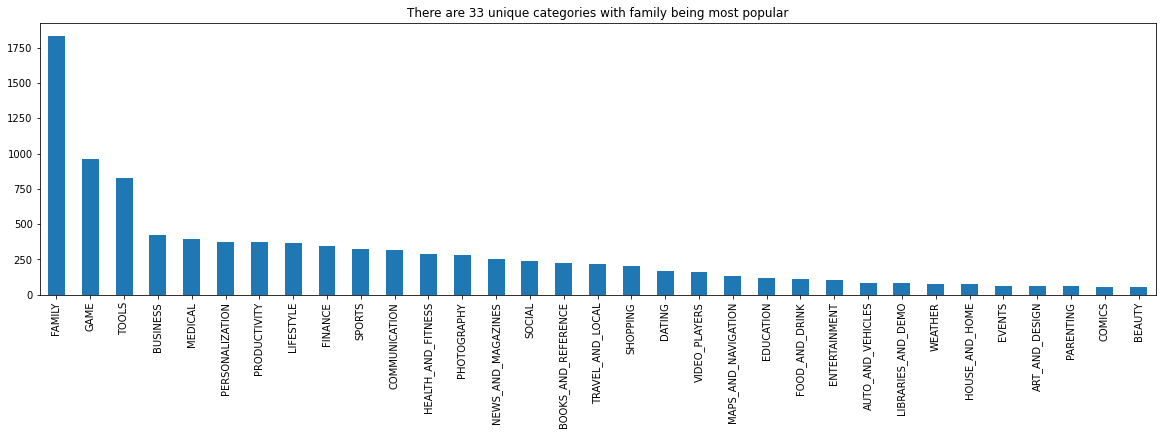

In [43]:
#number of cats
num_cat= len(apps['Category'].unique())

mpop_cat = apps['Category'].value_counts().index.tolist()[0].lower()

sorted_num_app_cat = num_app_cat.sort_values(ascending = False)

apps['Category'].value_counts().plot(kind = 'bar', figsize=(20,5))
plt.title('There are '+ str(num_cat) + ' unique categories' + ' with ' + str(mpop_cat) + ' being most popular')
plt.show()

#### 4. Distribution of ratings

#### 5. Price and size of an app

#### 6. App category and its price